<a href="https://colab.research.google.com/github/TarunKumar19/TrafficSignsClassification/blob/main/Traffic_Signs_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 611M/612M [00:32<00:00, 21.2MB/s]
100% 612M/612M [00:32<00:00, 19.9MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip')
zip.extractall('/content')
zip.close()

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [13]:
imgs_path = "/content/train"
data = []
labels = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("Done")

Done


In [20]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


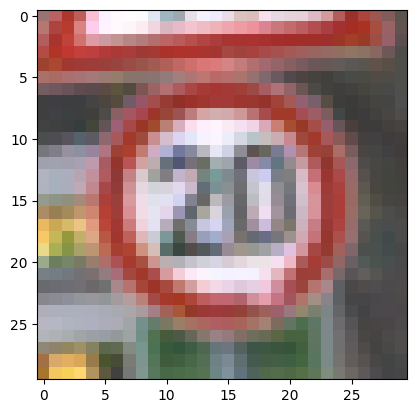

In [19]:
path = "/content/Train/0/00000_00000_00010.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [23]:
#Convert labels to onehot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [24]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [25]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
981/981 [==============================] - 18s 6ms/step - loss: 2.0282 - accuracy: 0.4816 - val_loss: 0.6350 - val_accuracy: 0.8406
Epoch 2/25
981/981 [==============================] - 6s 7ms/step - loss: 0.6999 - accuracy: 0.7914 - val_loss: 0.3080 - val_accuracy: 0.9174
Epoch 3/25
981/981 [==============================] - 6s 6ms/step - loss: 0.4354 - accuracy: 0.8737 - val_loss: 0.1201 - val_accuracy: 0.9689
Epoch 4/25
981/981 [==============================] - 6s 7ms/step - loss: 0.3347 - accuracy: 0.9065 - val_loss: 0.1191 - val_accuracy: 0.9654
Epoch 5/25
981/981 [==============================] - 6s 6ms/step - loss: 0.3032 - accuracy: 0.9157 - val_loss: 0.1036 - val_accuracy: 0.9735
Epoch 6/25
981/981 [==============================] - 6s 7ms/step - loss: 0.2898 - accuracy: 0.9215 - val_loss: 0.0619 - val_accuracy: 0.9825
Epoch 7/25
981/981 [==============================] - 6s 6ms/step - loss: 0.2551 - accuracy: 0.9285 - val_loss: 0.0761 - val_accuracy: 0.9788
Epoch

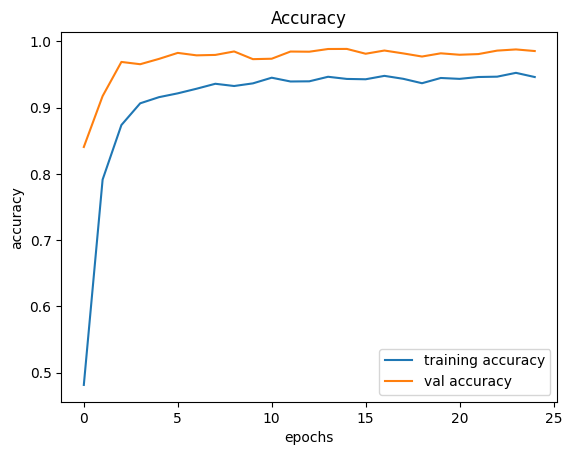

In [27]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

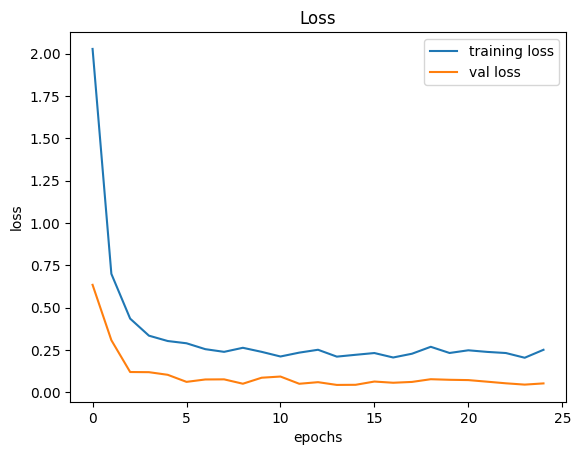

In [28]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [30]:
X_test, label = testing('/content/Test.csv')

In [34]:
predict_x = model.predict(X_test)
Y_pred =np.argmax(predict_x,axis=1)
Y_pred

395/395 [==============================] - 1s 2ms/step


array([16,  1, 38, ..., 32,  7, 10])

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9589865399841647


In [ ]:
#Load the Model
import os
os.chdir(r'D:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')